In [68]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib

In [39]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [40]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [43]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [44]:
data.drop('CustomerID',axis=1,inplace=True)


In [45]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [46]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [95]:
X1=data.loc[:,['Age','Spending Score (1-100)']].values
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X1)


AgglomerativeClustering(n_clusters=4)

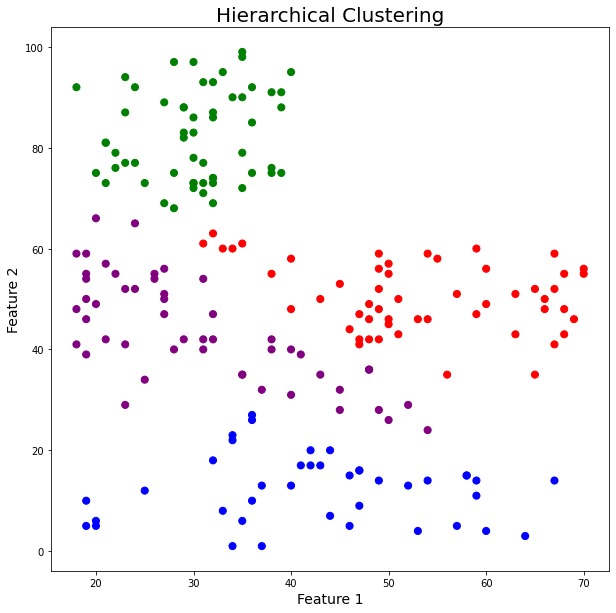

In [96]:
data['HR_labels']=model.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(data['Age'],data['Spending Score (1-100)'],c=data['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [97]:
X2=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X2)


AgglomerativeClustering(n_clusters=4)

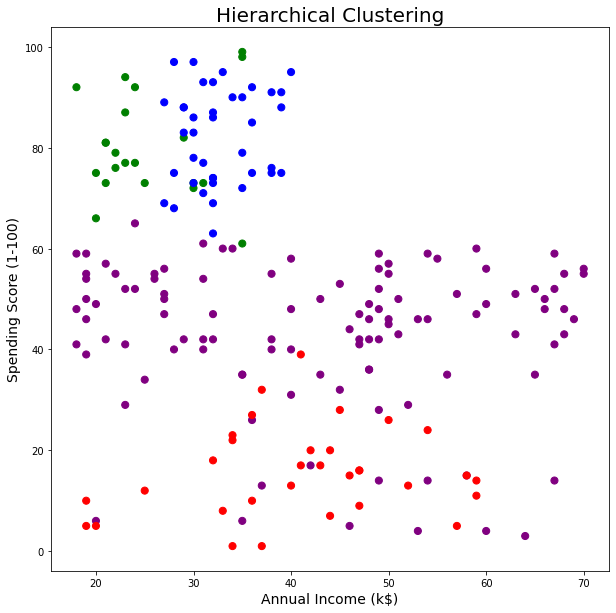

In [98]:
data['HR_labels']=model.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(data['Age'],data['Spending Score (1-100)'],c=data['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.show()

In [99]:
X_final=data.loc[:]
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X_final)


AgglomerativeClustering(n_clusters=4)

In [101]:
data['label']=model.labels_


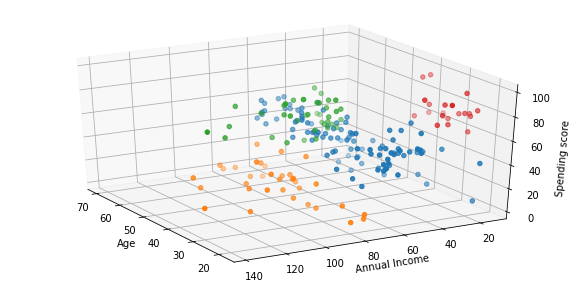

In [102]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data.Age[data.label==0],data['Annual Income (k$)'][data.label==0],data['Spending Score (1-100)'][data.label==0 ])
ax.scatter(data.Age[data.label==1],data['Annual Income (k$)'][data.label==1],data['Spending Score (1-100)'][data.label==1 ])
ax.scatter(data.Age[data.label==2],data['Annual Income (k$)'][data.label==2],data['Spending Score (1-100)'][data.label==2 ])
ax.scatter(data.Age[data.label==3],data['Annual Income (k$)'][data.label==3],data['Spending Score (1-100)'][data.label==3 ])
ax.scatter(data.Age[data.label==4],data['Annual Income (k$)'][data.label==4],data['Spending Score (1-100)'][data.label==4 ])
ax.view_init(30,150)
plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel("Spending score ")
plt.show()
